In [2]:
import ROOT
import argparse
import os
import ROOT
import re

Welcome to JupyROOT 6.12/07


In [3]:
%%bash
pwd

/work/bevila_t/HpC_Analysis/test_flashggfinalfit/CMSSW_10_2_13/src/flashggFinalFit


In [4]:
workspace = ROOT.RooWorkspace("multipdf","multipdf") 

In [7]:
f   = ROOT.TFile.Open("../flashggFinalFit/higgs_dna_signals_2017/allData_2017.root")
win = f.Get("tagsDumper/cms_hgg_13TeV")
#sQr  = ROOT.RooRealVar("SqrtS", "SqrtS in TeV", 13, -ROOT.RooNumber.infinity(), ROOT.RooNumber.infinity())
sQr  = ROOT.RooRealVar("SqrtS", "SqrtS in TeV", 13, "TeV")
intL = win.var("intLumi")
mass = win.var("CMS_hgg_mass")
win.Print()
sQr.Print()
intL.Print()
mass.Print()
norm = ROOT.RooRealVar("CMS_hgg_WStest_2017_13TeV_bkgshape_norm", "normalization", 1, 0, ROOT.RooNumber.infinity())
norm.Print()


RooWorkspace(cms_hgg_13TeV) cms_hgg_13TeV contents

variables
---------
(CMS_hgg_mass,centralObjectWeight,intLumi,weight)

datasets
--------
RooDataSet::Data_13TeV_WStest(CMS_hgg_mass,centralObjectWeight)

RooRealVar::SqrtS = 13 C  L(-INF - +INF) // [TeV]
RooRealVar::intLumi = 1000 C  L(0 - 1e+09) 
RooRealVar::CMS_hgg_mass = 122.788  L(100 - 180) B(160) 
RooRealVar::CMS_hgg_WStest_2017_13TeV_bkgshape_norm = 1  L(0 - +INF) 


In [31]:
order = 5
prefix = "env_pdf_0_2017_13TeV_bern5"
params = {}
prods = {}
coeffList = ROOT.RooArgList()
init_p = [0.5, 0.4, 0.3,0.2, 0.2, 0.1]
for i in range(order):
    name = '{}_p{}'.format(prefix, i)
    param = ROOT.RooRealVar(name,name,init_p[i],-15.,15.)
    form = ROOT.RooFormulaVar(name+"_sq", name+"_sq", "@0*@0", ROOT.RooArgList(param))
    params[name] = param
    prods[name] = form
    coeffList.add(prods[name])
coeffList.Print()
bern = ROOT.RooBernsteinFast(order)(prefix,prefix,mass,coeffList)


RooArgList:: = (env_pdf_0_2017_13TeV_bern5_p0_sq,env_pdf_0_2017_13TeV_bern5_p1_sq,env_pdf_0_2017_13TeV_bern5_p2_sq,env_pdf_0_2017_13TeV_bern5_p3_sq,env_pdf_0_2017_13TeV_bern5_p4_sq)


In [32]:
data = win.data("Data_13TeV_WStest")
blind_data = data.reduce(ROOT.RooArgSet(mass), "CMS_hgg_mass>135||CMS_hgg_mass<115")
mass.setRange("left", 100, 115)
mass.setRange("right", 135, 180)
data.Print()
blind_data.Print()
dh = ROOT.RooDataHist("Data_13TeV_WStest", "Data_13TeV_WStest", ROOT.RooArgSet(mass), data)
dh.Print()

RooDataSet::Data_13TeV_WStest[CMS_hgg_mass,centralObjectWeight,weight:weight] = 318710 entries (318710 weighted)
RooDataSet::Data_13TeV_WStest[CMS_hgg_mass,weight:weight] = 222184 entries (222184 weighted)
RooDataHist::Data_13TeV_WStest[CMS_hgg_mass] = 160 bins (318710 weights)


In [33]:
#nll = bern.createNLL(data, ROOT.RooFit.Range("left,right"))
nll = bern.createNLL(data)
nll.Print()
minim = ROOT.RooMinimizer(nll)
minim.minimize("Minuit2","migrad")

0

RooNLLVar::nll_env_pdf_0_2017_13TeV_bern5_Data_13TeV_WStest[ paramSet=(env_pdf_0_2017_13TeV_bern5_p0,env_pdf_0_2017_13TeV_bern5_p1,env_pdf_0_2017_13TeV_bern5_p2,env_pdf_0_2017_13TeV_bern5_p3,env_pdf_0_2017_13TeV_bern5_p4) ] = 1.3134e+06
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
MnSeedGenerator: for initial parameters FCN = 1313395.74624
MnSeedGenerator: Initial state:   - FCN =    1313395.74624 Edm =      26637.2 NCalls =     31
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =    1313395.74624 Edm =      26637.2 NCalls =     31
VariableMetric: Iteration #   0 - FCN =    1313395.74624 Edm =      26637.2 NCalls =     31
VariableMetric: Iteration #   1 - FCN =   1309427.766773 Edm =      4803.99 NCalls =     47
VariableMetric: Iteration #   2 - FCN =   1308666.157521 Edm =      187.824 NCalls =     59
VariableMetric: Iteration #   3 - FCN =   1308506.042857 Edm =      5.39014 NCalls =     70
VariableMetric

In [34]:
#bern.Print("v")
#mass.setRange("left", 100, 115)
#mass.setRange("right", 135, 180)
#r_sig = bern.fitTo(data,  ROOT.RooFit.Save(ROOT.kTRUE), ROOT.RooFit.Range("left,right"))
#bern.Print("v")

In [35]:
#r_sig.Print()
#print("#"*100)
#bern.Print("v")

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 222184 events out of 318710 total events
[#0] ERROR:InputArguments -- RooAbsReal::plotOn(env_pdf_0_2017_13TeV_bern5) ERROR: unrecognized command: CutRange


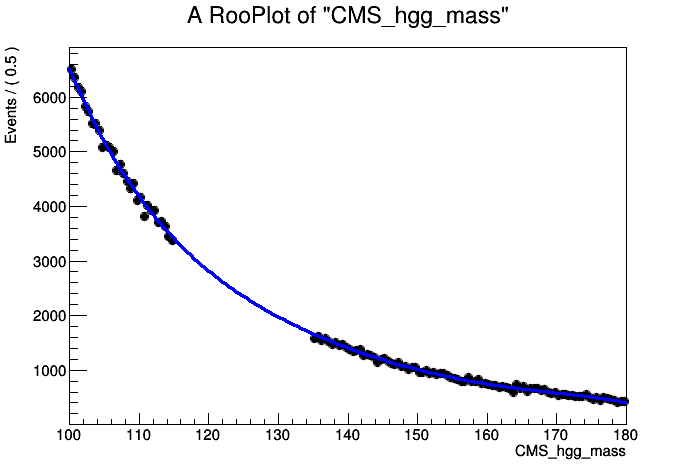

In [39]:
frame = mass.frame()

c = ROOT.TCanvas()
#data.plotOn(frame)
init_p = [0.517878, 0.444666, 0.329525,0.273955 , 0.229701]
data.plotOn(frame,ROOT.RooFit.CutRange("left,right"))
#data.plotOn(frame,ROOT.RooFit.Invisible())
bern.plotOn(frame,ROOT.RooFit.CutRange("nll_env_pdf_0_2017_13TeV_bern5_Data_13TeV_WStest_left"))
frame.SetMinimum(0.0001)
frame.Draw()
c.Draw()

RooRealVar::CMS_hgg_WStest_2017_13TeV_bkgshape_norm = 318710  L(0 - +INF) 


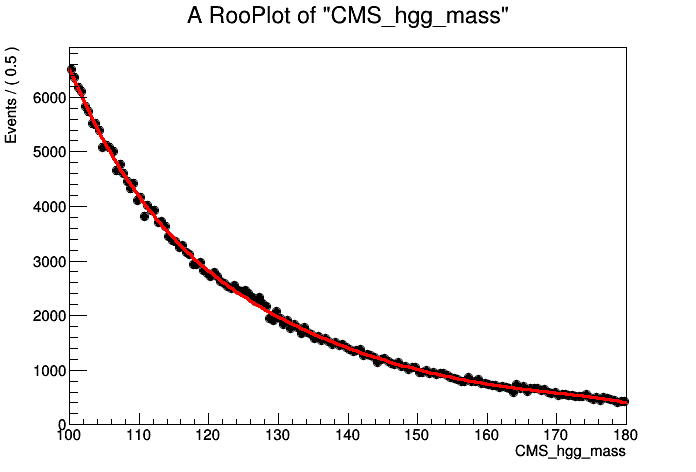

In [16]:
frame = mass.frame()
c = ROOT.TCanvas()
dh.plotOn(frame)
bern.plotOn(frame,)
storedPdfs = ROOT.RooArgList("store")
storedPdfs.add(bern)
catIndex = ROOT.RooCategory("pdfindex_WStest_2017_13TeV","c")
multi = ROOT.RooMultiPdf("CMS_hgg_WStest_2017_13TeV_bkgshape", "all pdfs",catIndex,storedPdfs)
multi.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kRed))
frame.Draw()
c.Draw()
norm.setVal(dh.sum(False,False))
norm.Print()

mass.setBins(160)

# Create a binned dataset with 20 bins and 500 events
hist1 = data.binnedClone()
hist1.Print()
c = ROOT.TCanvas()
hist1.plotOn(frame)
#data.plotOn(frame,ROOT.RooFit.Invisible())
bern.plotOn(frame)
frame.SetMinimum(0.0001)
frame.Draw()
c.Draw()

In [17]:
#getattr(workspace,'import')(bern)
getattr(workspace,'import')(multi)
getattr(workspace,'import')(sQr)
getattr(workspace,'import')(norm)
getattr(workspace,'import')(intL)
getattr(workspace,'import')(dh)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooMultiPdf::CMS_hgg_WStest_2017_13TeV_bkgshape
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooCategory::pdfindex_WStest_2017_13TeV
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooBernsteinFast<5>::env_pdf_0_2017_13TeV_bern5
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooRealVar::CMS_hgg_mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p0_sq
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooRealVar::env_pdf_0_2017_13TeV_bern5_p0
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p1_sq
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooRealVar::env_pdf_0_2017_13TeV_bern5_p1
[#1] INFO:ObjectHandling -- RooWorkspace::import(multipdf) importing RooFormulaVar::env_pdf_0_2017_13TeV_be

In [18]:
workspace.Print()
workspace.var("CMS_hgg_WStest_2017_13TeV_bkgshape_norm").Print()


RooWorkspace(multipdf) multipdf contents

variables
---------
(CMS_hgg_WStest_2017_13TeV_bkgshape_norm,CMS_hgg_mass,SqrtS,env_pdf_0_2017_13TeV_bern5_p0,env_pdf_0_2017_13TeV_bern5_p1,env_pdf_0_2017_13TeV_bern5_p2,env_pdf_0_2017_13TeV_bern5_p3,env_pdf_0_2017_13TeV_bern5_p4,intLumi,pdfindex_WStest_2017_13TeV)

p.d.f.s
-------
RooMultiPdf::CMS_hgg_WStest_2017_13TeV_bkgshape[ _pdfs=(env_pdf_0_2017_13TeV_bern5) _index=pdfindex_WStest_2017_13TeV ] = 0.389876
RooBernsteinFast<5>::env_pdf_0_2017_13TeV_bern5[ x=CMS_hgg_mass coefList=(env_pdf_0_2017_13TeV_bern5_p0_sq,env_pdf_0_2017_13TeV_bern5_p1_sq,env_pdf_0_2017_13TeV_bern5_p2_sq,env_pdf_0_2017_13TeV_bern5_p3_sq,env_pdf_0_2017_13TeV_bern5_p4_sq) ] = 0.389876

functions
--------
RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p0_sq[ actualVars=(env_pdf_0_2017_13TeV_bern5_p0) formula="@0*@0" ] = 0.252834
RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p1_sq[ actualVars=(env_pdf_0_2017_13TeV_bern5_p1) formula="@0*@0" ] = 0.329407
RooFormulaVar::env_pdf_0_201

In [19]:
workspace.writeToFile("mymultipdf_workspace_bdt.root")

False

In [15]:
f   = ROOT.TFile.Open("mymultipdf_workspace.root")
wout = f.Get("multipdf")
wout.Print()


RooWorkspace(multipdf) multipdf contents

variables
---------
(CMS_hgg_WStest_2017_13TeV_bkgshape_norm,CMS_hgg_mass,SqrtS,env_pdf_0_2017_13TeV_bern5_p0,env_pdf_0_2017_13TeV_bern5_p1,env_pdf_0_2017_13TeV_bern5_p2,env_pdf_0_2017_13TeV_bern5_p3,env_pdf_0_2017_13TeV_bern5_p4,intLumi,pdfindex_WStest_2017)

p.d.f.s
-------
RooMultiPdf::CMS_hgg_WStest_2017_13TeV_bkgshape[ _pdfs=(env_pdf_0_2017_13TeV_bern5) _index=pdfindex_WStest_2017 ] = 0.837658
RooBernsteinFast<5>::env_pdf_0_2017_13TeV_bern5[ x=CMS_hgg_mass coefList=(env_pdf_0_2017_13TeV_bern5_p0_sq,env_pdf_0_2017_13TeV_bern5_p1_sq,env_pdf_0_2017_13TeV_bern5_p2_sq,env_pdf_0_2017_13TeV_bern5_p3_sq,env_pdf_0_2017_13TeV_bern5_p4_sq) ] = 0.837658

functions
--------
RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p0_sq[ actualVars=(env_pdf_0_2017_13TeV_bern5_p0) formula="@0*@0" ] = 0.267976
RooFormulaVar::env_pdf_0_2017_13TeV_bern5_p1_sq[ actualVars=(env_pdf_0_2017_13TeV_bern5_p1) formula="@0*@0" ] = 0.197867
RooFormulaVar::env_pdf_0_2017_13TeV_bern

In [10]:
f   = ROOT.TFile.Open("../Combine/Models/signal/CMS-HGG_sigfit_test_hdna_GG2H_WStest_2017_WStest.root")
my_w = f.Get("wsig_13TeV")
my_w.Print()


RooWorkspace(wsig_13TeV) wsig_13TeV contents

variables
---------
(CMS_hgg_mass,IntLumi,MH,dZ)

p.d.f.s
-------
RooExtendPdf::extendhggpdfsmrel_GG2H_WStest_2017_WStest_13TeV[ pdf=hggpdfsmrel_GG2H_WStest_2017_WStest_13TeV n=hggpdfsmrel_GG2H_WStest_2017_WStest_13TeV_norm ] = 0.821936
RooExtendPdf::extendhggpdfsmrel_GG2H_WStest_2017_WStest_13TeVThisLumi[ pdf=hggpdfsmrel_GG2H_WStest_2017_WStest_13TeV n=hggpdfsmrel_GG2H_WStest_2017_WStest_13TeV_normThisLumi ] = 0.821936
RooGaussian::gaus_g0_GG2H_WStest_2017_WStest_13TeV[ x=CMS_hgg_mass mean=mean_g0_GG2H_WStest_2017_WStest_13TeV sigma=sigma_g0_GG2H_WStest_2017_WStest_13TeV ] = 0.943395
RooGaussian::gaus_g1_GG2H_WStest_2017_WStest_13TeV[ x=CMS_hgg_mass mean=mean_g1_GG2H_WStest_2017_WStest_13TeV sigma=sigma_g1_GG2H_WStest_2017_WStest_13TeV ] = 0.549973
RooGaussian::gaus_g2_GG2H_WStest_2017_WStest_13TeV[ x=CMS_hgg_mass mean=mean_g2_GG2H_WStest_2017_WStest_13TeV sigma=sigma_g2_GG2H_WStest_2017_WStest_13TeV ] = 0.88819
RooGaussian::gaus_g3_GG2H_